# ПРОЕКТ

## Общая информация

<div style="background-color: RoyalBlue;">
   
Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

    Описание данных games.csv

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (от 0 до 100)
    User_Score — оценка пользователей (от 0 до 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.
</div>

**ЗАДАЧА:**

       
    Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


In [ ]:
# Загрузим файл с данными и ознакомимся с данными, выведем первые 5 строк

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings
%matplotlib inline

#!wget http://m.ric.media/praktikum/games.csv

df = pd.read_csv('http://m.ric.media/praktikum/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
#посмотрим на структуру датафрейма 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


ВЫВОД: Не хватает значений в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating
Вероятно есть пропуски.

<div style="background-color: RoyalBlue;">
Пропуски могут быть случайными и неслучайными. В нашем случае в таких категориальных данных как 
    Year_of_Release - пропуски могут быть случайными из-за отсутствия данных по старой игре, дата релиза неизвестна, удалить строки нельзя, т.к. мы получим неверные данные по суммам продаж, поэтому как и в других случаях со случайными пропусками имеет смысл заменить их на нули.
    Name - случайный пропуск, возможно из-за человеческой ошибки, заменим на Unknown.
    Genre - поступим также как с Name по тем же причинам.
    Critic_Score - количественная переменная, возможно пропуск связан с отсутствием значения для этой игры.
    User_Score - представлена нам как категориальная переменная, нужно преобразовать в тип float, по ходу действия нужно найти все NaN Обозначенные как tbn и заменить на NaN, и уже потом преобразовать в тип float.
    (NaN это отсутсвие значения в количесвенной переменной).
    Rating - это категориальная переменная, ситуация с пропусками та же что и в столбцах Name и Genre 
</div>

## Подготовим данные

### Приведем названия столбцов к нижнему регистру для удобства при написании в коде, это позволит избежать опечаток при работе со столбцами таблицы

In [ ]:
# Приведем названия столбцов к нижнему регистру

df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


обработаем пропуски и приведем к нужному типу данных столбцы

In [ ]:
# сначала обработаем пропуски в столбцах с пропусками значений ( в них значения меньше 16715 )
# ошибки в категориальных переменных заменим на '0' (Ноль) и Unknown (Неизвестные)

# имя просто на неизвестные
# год релиза тоже категориальная переменная и замена на ноль не повлияет на анализ в выборках
# жанр и рейтинг тоже категориальные переменные

df['name'] = df['name'].fillna('Unknown') 
df['year_of_release'] = df['year_of_release'].fillna(0) 
df['genre'] = df['genre'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# при попытке привести столбец user_score к типу float64
#df['user_score'] = df['user_score'].astype('float64')
# получаем ошибку 
# ValueError: could not convert string to float: 'tbd' 
# это значение аналогичное NaN для численных переменных и Unknown для категориальных переменных

# сначала почистим строковык значения от 'tbd' и заменим их на 'NaN' 
# после конвертации типа столбца NaN нам пригодятся для корректных расчетов значений в этом столбце (NaN - это не число)

df['user_score'] = df['user_score'].replace('tbd', 'NaN')

# затем преобразуем тип user_score во float

df['user_score'] = df['user_score'].astype('float')

# год релиза преобразуем в integer

df['year_of_release'] = df['year_of_release'].astype('int')

# проверим структуру

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


проверим на дубликаты 

In [ ]:
# проверим на дубликаты сначала без учета регистра
df.duplicated().sum()

0

ИТОГ: дубликатов нет


In [ ]:
# проверим на дубликаты с учетом регистра, 
# предварительно все строковые столбцы передем в нижний регистр

df_lower = df.copy(deep=True)
df_lower['name'] = df_lower['name'].str.lower()
df_lower['platform'] = df_lower['platform'].str.lower()
df_lower['genre'] = df_lower['genre'].str.lower()
df_lower['rating'] = df_lower['rating'].str.lower()
df_lower.duplicated().sum()

0

ИТОГ: дубликатов нет

посчитаем суммарные продажи регионов в отдельный столбец

In [ ]:
# 
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

ИТОГ:
    На этапе предобработки обнаружили пропуски в данных и неверные типы данных. Исправили.
    Создали столбец по глобальным продажам. 

## Проведем исследовательский анализ данных

### сколько игр выпускалось в разные годы

In [ ]:
# 

df.groupby('year_of_release')['name'].count()

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

ВЫВОД: 
по данным видно что в разы больше игр стало выходить с 1994 года. произошел скачек в производительности и доступности игр и приставок. Больший объем игр видим после 1994 года. Возможно с 1994 года данные более презентативные.
Максимальные значения в интервале с 2006 по 2011 годы. 

<div style="background-color: RoyalBlue;">
Максимальные значения наблюдаются с 2006 по 2011 год. Возможно скачек связан с какими то внешними факторами, например, экономический рост и вырос спрос на игры, либо привлечение в сферу игр большей аудитории, например больше игр стало производиться, в том числе для взрослого населения, и портрет игрока стал шире. 
    С 2012 года до 2016 наблюдается спад. Причиной может быть как экономический спад и соответственно нет такого спроса как раньше, так и остывание самого рынка игр и попытка производителей вкладываться в один качественный продукт вместо нескольких, что тоже отражается в количестве выпускаемых игр. И напоследок очень важный фактор в том что со временем при развитии электроники и мощностей, программная разработка становится все дороже для производителей, соответственно ставки высоки и количество серьезных и "тяжелых" игр выпускаемых производителем меньше.
</div>

### как менялись продажи по платформам

In [ ]:
# посмотрим сводную таблицу по годам и платформам
# возьмем ключевые года где существенно менялось сумма продаж 
platforms_by_years = (
    df.query('year_of_release in (1980, 1993, 1994, 2005, 2006, 2011, 2012, 2016)')
        .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)
platforms_by_years

platform,2600,3DO,3DS,DS,GB,GBA,GC,GEN,NES,NG,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.07,3.61,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.50,40.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,0.02,NaN,NaN,12.18,NaN,NaN,8.13,0.11,0.80,12.87,6.03,NaN,NaN,NaN,NaN,NaN,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,130.14,NaN,33.86,27.62,NaN,NaN,NaN,4.37,NaN,160.66,NaN,NaN,43.84,NaN,NaN,NaN,NaN,NaN,NaN,8.25,49.08,NaN
2006,NaN,NaN,NaN,119.81,NaN,5.28,11.26,NaN,NaN,NaN,2.85,NaN,103.42,20.96,NaN,55.32,NaN,NaN,NaN,NaN,137.15,NaN,51.62,10.04,NaN
2011,NaN,NaN,63.20,26.18,NaN,NaN,NaN,NaN,NaN,NaN,35.03,NaN,0.45,156.78,NaN,17.82,4.63,NaN,NaN,NaN,59.65,NaN,143.84,NaN,NaN
2012,NaN,NaN,51.36,11.01,NaN,NaN,NaN,NaN,NaN,NaN,23.22,NaN,NaN,107.36,NaN,7.69,16.19,NaN,NaN,NaN,21.71,17.56,99.74,NaN,NaN
2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,NaN,NaN,3.60,69.25,NaN,4.25,NaN,NaN,NaN,0.18,4.60,1.52,NaN,26.15


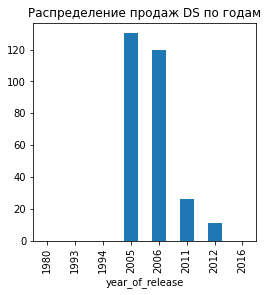

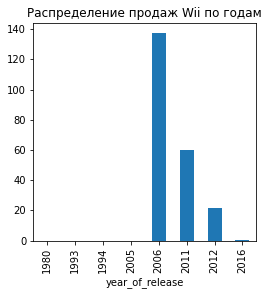

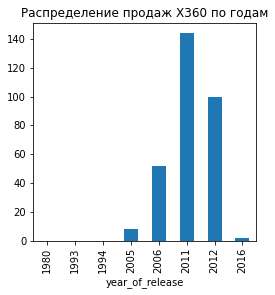

In [ ]:
# построим графики продаж по нашему срезу данных и по платформам DS, Wii и X360

plt.title('Распределение продаж DS по годам')
platforms_by_years['DS'].plot(x='year_of_release', kind='bar', figsize=(4, 4))
plt.show()
plt.title('Распределение продаж Wii по годам')
platforms_by_years['Wii'].plot(x='year_of_release', kind='bar', figsize=(4, 4))
plt.show()
plt.title('Распределение продаж X360 по годам')
platforms_by_years['X360'].plot(x='year_of_release', kind='bar', figsize=(4, 4))
plt.show()

ВЫВОД: Как видим после 1994 года старые платформы исчезают и приходят новые, с бОльшим количеством продаж за год. 
Второй ключевой год это 2005, появлются новые игры с большими бюджетами.
Определенно расцвет в игровой индустрии был с 2005 по 2011 годы, это примечательно по крупным продажам:
DS в 2005 году, Wii в 2006, X360 в 2011 годах.

In [ ]:
# отсечем данные до 1994 года

df_filtered = df.query('year_of_release >= 1994')

# Выведем суммарные продажи по платформам

platform_sales = df_filtered.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()

# переименуем столбцы и отсортируем по продажам
#platform_sales.columns = ['platform', 'total_sales']
platform_sales = platform_sales.sort_values(by='total_sales')
platform_sales

,platform,total_sales
12,PCFX,0.03
0,3DO,0.10
9,NES,0.11
22,TG16,0.16
20,SCD,0.36
10,NG,1.23
23,WS,1.42
7,GEN,8.13
2,DC,15.95
19,SAT,33.59


ВЫВОД: Наши лидеры в топ продаж. Топ лидеров продают на суммы более чем в два раза больше остальных.

### найдем платформы с наибольшими суммарными продажами и построим распределение по годам

In [ ]:
# найдем платформы с продажами более 500 млн

big_platform_list = platform_sales.query('total_sales > 500')['platform']
big_platform_list

13      PS
3       DS
24     Wii
15     PS3
26    X360
14     PS2
Name: platform, dtype: object

In [ ]:
# выберем из датасета только платформы с наибольшими продажами

big_platform_sales = df_filtered.query('platform in @big_platform_list') #.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
big_platform_sales = big_platform_sales.sort_values(by='total_sales')
#big_platform_sales

# сводная таблица по суммарным продажам по платформе и годам среди ТОПов

big_platform_pivot = big_platform_sales.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum').reset_index()
big_platform_pivot

,platform,year_of_release,total_sales
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,146.94
4,DS,2008,145.31
...,...,...,...
61,X360,2012,99.74
62,X360,2013,88.58
63,X360,2014,34.74
64,X360,2015,11.96


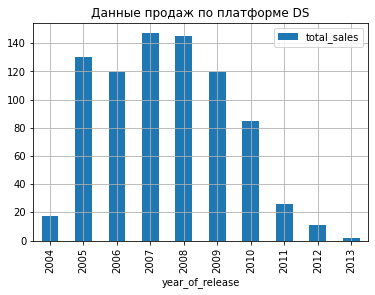

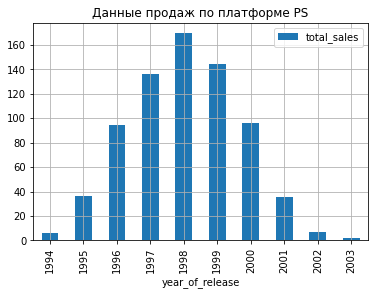

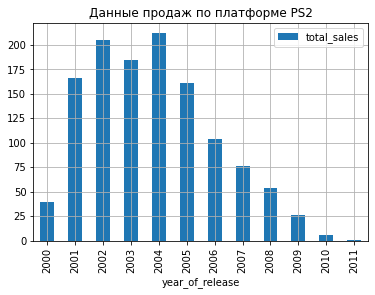

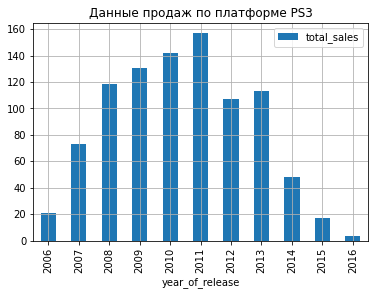

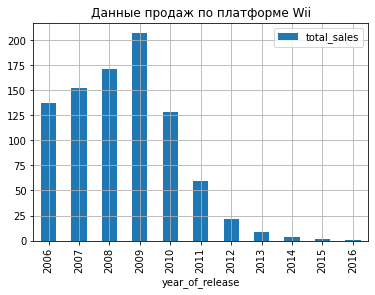

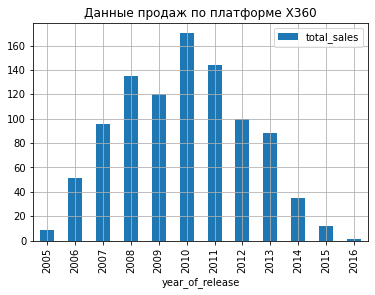

In [ ]:
# выберем платформы с наибольшими суммарными продажами и построим распределение по годам
# и построим для них распределение по годам
#import matplotlib.pyplot as plt

for platform_name,platform_data in big_platform_pivot.groupby('platform'):
    platform_data.plot(x = 'year_of_release', y='total_sales', kind='bar', xlim = (1994, 2016), title = 'Данные продаж по платформе {}'.format(platform_name), grid = True)
          


Поскольку большие продажи были в период с 2005 по 2011 то за "старые" возьмем те что были популярны до 2005. Исходя из графиков среди наших "ТОПов" это PS и PS2. Проверим их продажи на сегодня, год 2016. Исходя из графиков они нулевые. Последняя игра PS2 продана в 2011 году.


### за какой характерный период появляются новые и исчезают старые платформы?

In [ ]:
# попробуем найти платформы которые последнее время не выпускают игры, а до этого выпускали.
# данные о годе релиза игры у нас есть в поле year_of_release
# пороговое значение возьмем за 2 года, этого достаточно чтобы отсеить большинство умирающих платформ
# возьмем два отрезка времени: первый: с 1994 по 2014 год и второй: с 2015 по 2016
# соотв. назовем platforms_before и platforms_after

platforms_before = df.query('(year_of_release>=1994) and (year_of_release<=2014)')['platform'].unique()
print('Платформ в период с 1994 по 2014 год: ', len(platforms_before))
print(platforms_before)

platforms_after = df.query('(year_of_release>=2015) and (year_of_release<=2016)')['platform'].unique()
print('Платформ в период с 2015 по 2016 год: ', len(platforms_after))
print(platforms_after)



Платформ в период с 1994 по 2014 год:  29
['Wii' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'GBA' '3DS' 'PS4' 'N64' 'PS' 'SNES'
 'XB' 'PC' 'PSP' 'WiiU' 'GC' 'XOne' 'DC' 'PSV' 'SAT' 'GEN' 'WS' 'NG' 'SCD'
 'TG16' 'NES' '3DO' 'PCFX']
Платформ в период с 2015 по 2016 год:  10
['PS4' 'XOne' '3DS' 'WiiU' 'PS3' 'X360' 'PC' 'Wii' 'PSV' 'PSP']


Получили разницу в 6 платформ в эти периоды. Какие-то платформы перестали выпускать игры, либо сделали перерыв в производстве. Хотя для большинства платформ 2 года отсутствия новых игр это конец жизненного цикла.

In [ ]:
# найдем эти устаревающие платформы, которые перестали выпускать новые игры.

old_platform_list = list(set(platforms_before)-set(platforms_after))
old_platform_list

['NG',
 'TG16',
 'NES',
 'PS',
 'PCFX',
 'XB',
 'GC',
 'PS2',
 'SNES',
 'SAT',
 'SCD',
 'GB',
 'DS',
 'DC',
 'N64',
 'GEN',
 'WS',
 '3DO',
 'GBA']

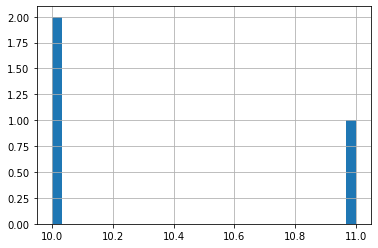

In [ ]:
# подготовим датасет из наших ТОПов, но исключим устаревшие и уже не выпускащие игры

big_platform_sales_without_old = df_filtered.query('(platform in @big_platform_list) and (platform not in @old_platform_list)') #.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
#big_platform_sales_without_old = big_platform_sales_without_old.sort_values(by='total_sales')

# найдем распределение среднего времени жизни платформ

platform_lifetime = big_platform_sales_without_old.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max']).reset_index()
platform_lifetime.columns = ['platform','pmin','pmax']
platform_lifetime['lifetime'] = platform_lifetime['pmax'] - platform_lifetime['pmin']

# отфильтруем те что с нулями и отрицательные

platform_lifetime = platform_lifetime.query('pmin>0 and pmax>0 and lifetime>0')

#platform_lifetime['lifetime'].median()
#platform_lifetime['lifetime'].mean()

# построим частотную гистограмму
platform_lifetime['lifetime'].hist(bins=30)

Вывод: 
Нас интересуют закономерности успешных платформ. Поэтому исходя из анализа самых успешных по продажам платформ, приходим к выводу, что средняя продолжительность жизни успешной платформы может быть или 10, или 11 лет. Причем 10 летки встречается вдвое чаще чем 11 летки.
Все наши ТОПы, исключая те которые уже не продаются, попадают в интервал 11 лет: с 2005 по 2016 год.

In [ ]:
# отсечем данные до 2005 года (2016 - 11лет = 2005 год включительно)

df = df.query('year_of_release >= 2005')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


### Определим данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году

In [ ]:
# поскольку цикл успешной платформы 9-11 лет, то исходя из нормального распределения 
# предположим, что половина этого времени популярность растет, а другая половина идет на спад.
# поделим этот цикл пополам и возьмем 5 лет.
# получим те у которых популярность или растет или на исходе, но не весь цикл
# этого среза достаточно чтобы оценить динамику платформы по графику или цифрам

# сформируем сводную таблицу: суммарные продажи по годам и платформам

top_platform_data = df.query('year_of_release>=2012').pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc=['sum','count']).reset_index()
top_platform_data.columns = ['year_of_release','platform','total_sales','games']

# возьмем количество уникальных имен платформ 

#len(top_platform_data['platform'].unique()) #11


# сохраним список ТОП платформ по продажам за последний период
top_platform = top_platform_data['platform'].unique()
top_platform #11


array(['3DS', 'DS', 'PC', 'PS3', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'PS4', 'XOne'], dtype=object)

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ

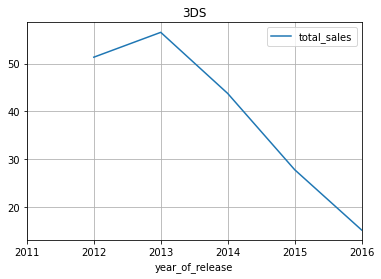

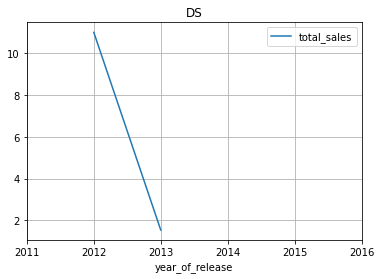

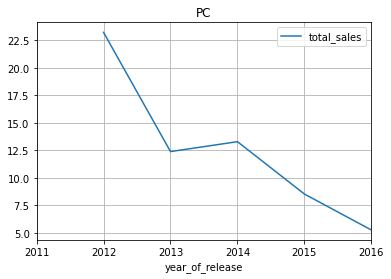

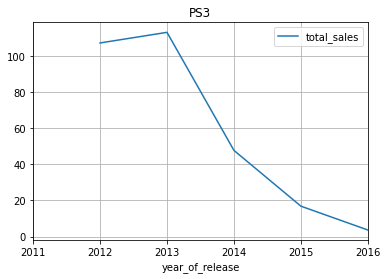

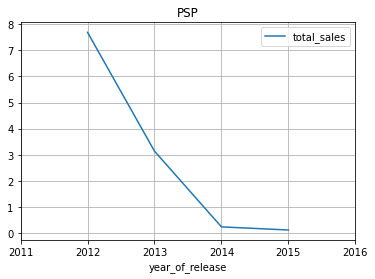

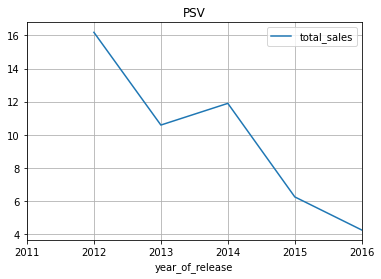

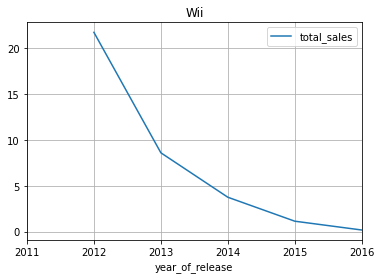

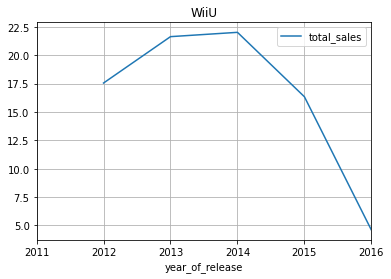

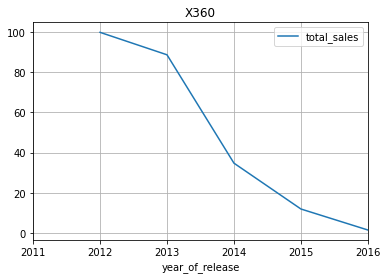

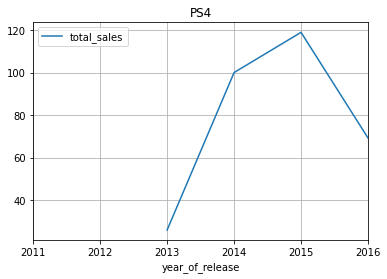

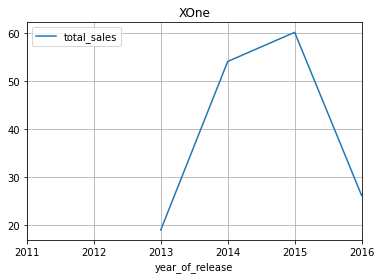

In [ ]:
# выведем их графики продаж по годам

for pl in top_platform:
    top_platform_data[top_platform_data['platform']==pl].plot(x = 'year_of_release', y='total_sales', xlim = (2011, 2016), title = pl, grid = True)


In [ ]:
# посмотрим в цифрах изменения трендов продаж по платформам
df.query('year_of_release>=2012 and platform in @top_platform').pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').reset_index()

year_of_release,platform,2012,2013,2014,2015,2016
0,3DS,51.36,56.57,43.76,27.78,15.14
1,DS,11.01,1.54,NaN,NaN,NaN
2,PC,23.22,12.38,13.28,8.52,5.25
3,PS3,107.36,113.25,47.76,16.82,3.60
4,PS4,NaN,25.99,100.00,118.90,69.25
5,PSP,7.69,3.14,0.24,0.12,NaN
6,PSV,16.19,10.59,11.90,6.25,4.25
7,Wii,21.71,8.59,3.75,1.14,0.18
8,WiiU,17.56,21.65,22.03,16.35,4.60
9,X360,99.74,88.58,34.74,11.96,1.52


Вывод: Из 11 платформ,
DS и PSP прекратили продажи.

3DS, PC, PS3, PSV, Wii, WiiU, X360, PS4, XOne - еще не завершили свой тренд снижения.

XOne, PS4 начали продажи в 2013 и продажи еще высоки.

PC имеет тренд с остановками снижения и продажи стартовали высоко.

WiiU - продажи еще высоки, как и у PC

3DS старт продаж высоко и график линейный, спад без ускорения, можно оставить.

Выберем PS4, XOne, 3DS, PC, WiiU как потенциально прибыльные

### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

Проанализируем игры, посмотрим средние сборы за игру и математическое ожидание для глобальных продаж игр и с разбивкой по платформам. Увидим велика ли разница в продажах и как они отличаются на разных платформах.

In [ ]:
# сколько всего у нас игр

len(df.query('year_of_release>=2012').groupby('name')['name'])

1671

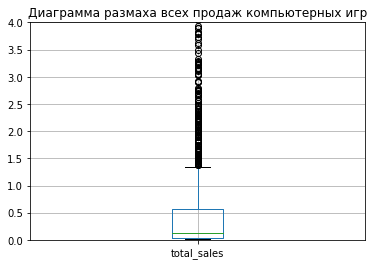

In [ ]:
games_sales_all = df.query('year_of_release>=2012').pivot_table(index='name', values='total_sales', aggfunc='sum').reset_index()
#games_sales_all
plt.ylim(0,4)
games_sales_all.boxplot()
plt.title('Диаграмма размаха всех продаж компьютерных игр')
plt.show()

In [ ]:
# представим данные таблицей

games_sales_all['total_sales'].describe()

count    1671.000000
mean        0.865667
std         2.652672
min         0.010000
25%         0.030000
50%         0.130000
75%         0.560000
max        56.580000
Name: total_sales, dtype: float64

Смотрим значения между Q1 и Q3 и медиану 50%. 
И так: Основной доход между от 0.03 до 0.56 млн. Обычно доход 0.13 млн. с каждой игры.
Максимальный зафиксированный доход с игры был 56.58 млн. долларов.

Теперь рассмотрим данные по каждой платформе

In [ ]:
# откорректируем список выбранных платформ
top_platform = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']
top_platform


['PS4', 'XOne', '3DS', 'PC', 'WiiU']

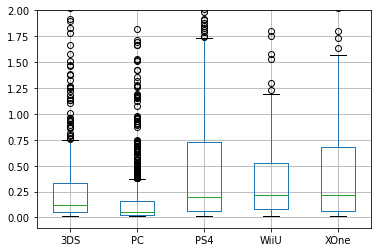

In [ ]:
# сформируем таблицу ТОП игр 
games_sales = df.query('platform in @top_platform').pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').reset_index()

# временно подавим предупреждения 
warnings.filterwarnings("ignore")

# Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам
plt.ylim(-0.1,2)
games_sales.boxplot()
plt.show()

# вернем предупреждения 
#warnings.filterwarnings("default")


In [ ]:
# представим таблицей описание разброса глобальных продаж по каждой игре и с разбивкой по платформам
# также добавим строку с глобальными продажами в таблицу
ds1 = []
total_sales_columns = []

games_sales_stat = pd.DataFrame(games_sales.describe().index) 
total_sales_columns.append('total_sales')

for i in range(1,len(games_sales.columns)):
    games_sales_stat[games_sales.columns[i]]=games_sales[games_sales.columns[i]].describe().values
    ds1 = df.query('platform in @top_platform').pivot_table(index='platform', values ='total_sales', aggfunc='sum')
    total_sales_columns.append(ds1.loc[games_sales.columns[i],'total_sales']) 
games_sales_stat.loc['total_sales'] = total_sales_columns


games_sales_stat.reset_index(drop = True)

,0,3DS,PC,PS4,WiiU,XOne
0,count,512.000000,812.000000,392.000000,147.000000,247.000000
1,mean,0.503535,0.206638,0.801378,0.559116,0.645020
2,std,1.441271,0.534592,1.609456,1.058836,1.036139
3,min,0.010000,0.010000,0.010000,0.010000,0.010000
4,25%,0.050000,0.020000,0.060000,0.080000,0.060000
5,50%,0.120000,0.050000,0.200000,0.220000,0.220000
6,75%,0.332500,0.160000,0.730000,0.525000,0.685000
7,max,14.600000,8.010000,14.630000,7.090000,7.390000
8,total_sales,257.810000,167.790000,314.140000,82.190000,159.320000


ВЫВОДЫ ПО ПЛАТФОРМАМ. 

    Лидер по количеству игр платформа - PC у них 812 игр, при этом общие продажи средние по рынку, а средние сборы за каждую игру минимальны. Возможно потому что платформа PC открытая, поэтому много игр и высока конкуренция, следовательно низкая средняя цена игр. 

    Самые успешная платформа на рынке - PS4. У неё максимальные сборы за все время, а сборы по самой популярной игре составили 14.63 млн долларов, средние сборы за каждую игру на этой площадке также самые высокие. Похоже становится очевидным фактор успеха, поскольку платформа PS4 закрытая и принадлежит одной компании, фактически среда дистрибуции одной компании, конкуренции нет. Поскольку платформа закрытая, возможно есть игры которые производятся только для нее, что даст высокие продажи именно на платформе в случае хита. Стандартное отклонение(1.6) больше чем у других, это говорит о том что хитов или провалов по играм у PS4 больше чем у других плтформ.

    XOne и WiiU показывают схожие результаты, с равным ожиданием по сборам каждой игры в 0.22 млн $ примерно одинаковым разбросом сборов по играм и почти одинаковым результатом по самой успешной игре - 7,39 и 7,09 млн $ соответственно. Отличает их лиш количество игр. У WiiU игр более чем на 40 %  меньше чем у XOne, и, соответствнно выручка более чем на 45% ниже. Хорошие и стабильные показатели свойственны закрытым платформам.

    3DS имеет средние ожидания по каждой игре 0.12 млн дол, при этом самая успешная игра собрала 14.6 млн дол. Также закрытая платформа, но совершенно из другого сегмента, это платформа для мобильных игр и карманного устройства. Разброс стандартного отклонения высок как у PS4, значит хиты и провали бывают чаще чем у PC.

Общий вывод: закрытость платформы это фактор повысить продажи, за счет эксклюзивов и возможных хитов. Но риски провалов тоже есть(стандартное отклонение как видим выше). При больших объемах продаж средняя будет стремится к медиане(ожиданиям) по продажам и будет выше в 4 раза чем у попавшей в наш ТОП открытой платформы(PC).
Да есть над чем задуматься маркетологам.

###  как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму 
рассеяния и посчитаем корреляцию между отзывами и продажами. 
Соотнесем данные по продажами игр на выбранных платформах.

In [ ]:
# выведем наши данные 
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [ ]:
# подготовим таблицу по оценкам пользователей и по сборам по всем играм
# корреляцию будем считать по всем "сырым" данным 

#us_score_sales_dep = df.pivot_table(index ='user_score', values = 'total_sales' , aggfunc = 'sum').reset_index()
us_score_sales_dep = df[['user_score','total_sales']]
us_score_sales_dep

#us_score_sales_dep.isna().sum()
#us_score_sales_dep = us_score_sales_dep.dropna()
#us_score_sales_dep

,user_score,total_sales
0,8.0,82.54
2,8.3,35.52
3,8.0,32.77
6,8.5,29.80
7,6.6,28.91
...,...,...
16709,NaN,0.00
16710,NaN,0.01
16711,NaN,0.01
16712,NaN,0.01


In [ ]:
# посмотрим величину корреляции оценок пользователей и продаж по всем играм

us_score_sales_dep['user_score'].corr(us_score_sales_dep['total_sales'])


0.07847859823897509

Корреляция (0.07) с оценками пользователей положительная и ближе к 0, т.е. параметры практически не взаимосвязаны. 
Вывод: Покупатели как правило не смотрят отзывы других покупателей этой игры.

In [ ]:
# подготовим таблицу по оценкам критиков и по сборам по всем играм
# корреляцию будем считать по всем "сырым" данным 

#crit_score_sales_dep = df.pivot_table(index ='critic_score', values = 'total_sales' , aggfunc = 'sum').reset_index()
crit_score_sales_dep = df[['critic_score','total_sales']]
crit_score_sales_dep

#crit_score_sales_dep.isna().sum()
#crit_score_sales_dep = crit_score_sales_dep.dropna()
#crit_score_sales_dep

,critic_score,total_sales
0,76.0,82.54
2,82.0,35.52
3,80.0,32.77
6,89.0,29.80
7,58.0,28.91
...,...,...
16709,NaN,0.00
16710,NaN,0.01
16711,NaN,0.01
16712,NaN,0.01


In [ ]:
# посмотрим величину корреляции оценок критиков и продаж

crit_score_sales_dep['critic_score'].corr(crit_score_sales_dep['total_sales'])

0.23351292111050292

Корреляция (0.23) с оценками критиков также положительная, но тоже близка к 0, т.е. очень мала.
Оценки критиков не очень влияют на продажи. 
Но отметим что это картина по всему рынку игр и по всем платформам.
Возможно есть дешевые игры, которые пользователи покупают и проверяют их качество на себе, либо есть множество классических игр, которые очень субъективны относительно вкусов людей.

Мы нашли корреляцию по продажам в целом. Проверим как распределяются эти значения в разных платформах. Покупатели также ориентируются больше на оценку критиков или больше доверяют своим товарищам по игре?

In [ ]:
for i in range(len(top_platform)):
    pl = top_platform[i]
    print(pl)
    #print(df.query('platform in @pl').pivot_table(index ='user_score', values = 'total_sales' , aggfunc = 'sum').reset_index().corr())
    #print(df.query('platform in @pl').pivot_table(index ='critic_score', values = 'total_sales' , aggfunc = 'sum').reset_index().corr())
    print(df.query('platform in @pl')[['user_score','total_sales']].corr())
    print(df.query('platform in @pl')[['critic_score','total_sales']].corr())
    print()


PS4
             user_score  total_sales
user_score     1.000000    -0.031957
total_sales   -0.031957     1.000000
              critic_score  total_sales
critic_score      1.000000     0.406568
total_sales       0.406568     1.000000

XOne
             user_score  total_sales
user_score     1.000000    -0.068925
total_sales   -0.068925     1.000000
              critic_score  total_sales
critic_score      1.000000     0.416998
total_sales       0.416998     1.000000

3DS
             user_score  total_sales
user_score     1.000000     0.222078
total_sales    0.222078     1.000000
              critic_score  total_sales
critic_score       1.00000      0.34874
total_sales        0.34874      1.00000

PC
             user_score  total_sales
user_score     1.000000    -0.027477
total_sales   -0.027477     1.000000
              critic_score  total_sales
critic_score      1.000000     0.276814
total_sales       0.276814     1.000000

WiiU
             user_score  total_sales
user_score    

Составим сводную таблицу по платформам и корреляции

In [ ]:
data = []
for i in range(len(top_platform)):
    pl = top_platform[i]
    data.append(
        [ 
            #df.query('platform in @pl').pivot_table(index ='user_score', values = 'total_sales' , aggfunc = 'sum').reset_index().corr().loc['user_score','total_sales'],
            #df.query('platform in @pl').pivot_table(index ='critic_score', values = 'total_sales' , aggfunc = 'sum').reset_index().corr().loc['critic_score','total_sales'] 
            df.query('platform in @pl')[['user_score','total_sales']].corr().loc['user_score','total_sales'],
            df.query('platform in @pl')[['critic_score','total_sales']].corr().loc['critic_score','total_sales'] 
        ])

score_depend = pd.DataFrame(data = data, columns = ['user_score', 'critic_score'] )    
score_depend['platform'] = top_platform

score_depend

,user_score,critic_score,platform
0,-0.031957,0.406568,PS4
1,-0.068925,0.416998,XOne
2,0.222078,0.348740,3DS
3,-0.027477,0.276814,PC
4,0.400219,0.348380,WiiU


Построим диаграмму рассеяния, чтобы посмотреть на разброс данный в более наглядной форме.

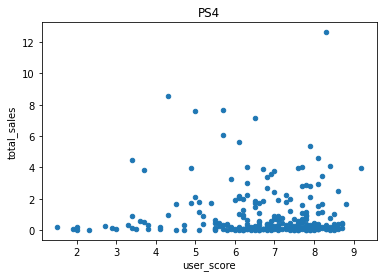

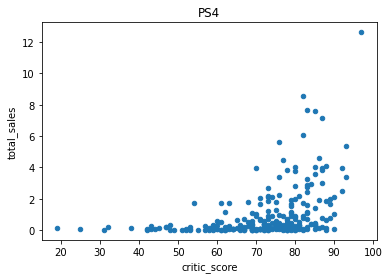

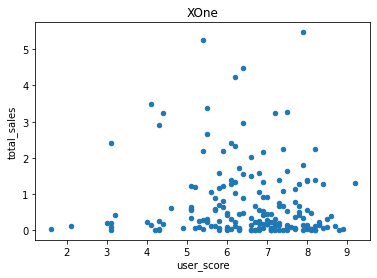

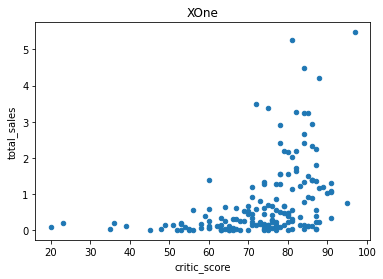

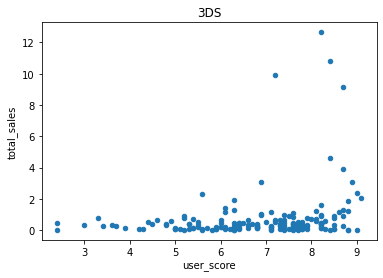

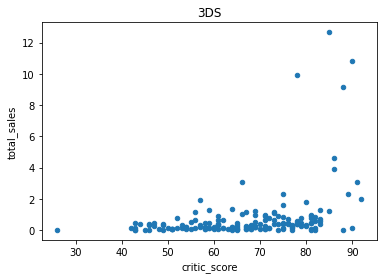

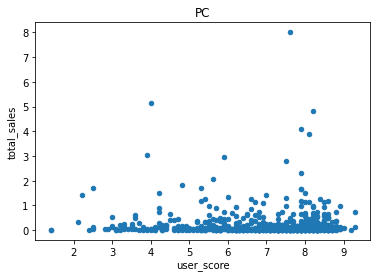

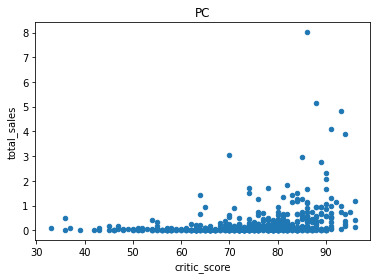

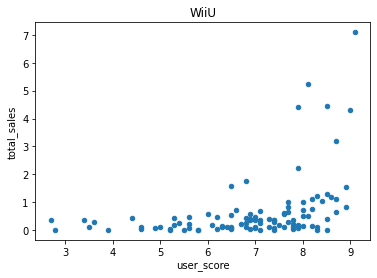

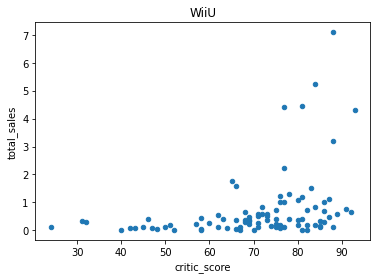

In [ ]:
for i in range(len(top_platform)):
    pl = top_platform[i]
    #df.query('platform in @pl').pivot_table(index ='user_score', values = 'total_sales' , aggfunc = 'sum').reset_index().plot(x='user_score', y='total_sales', kind='scatter', title=pl)
    #df.query('platform in @pl').pivot_table(index ='critic_score', values = 'total_sales' , aggfunc = 'sum').reset_index().plot(x='critic_score', y='total_sales', kind='scatter', title=pl)
    df.query('platform in @pl')[['user_score','total_sales']].plot(x='user_score', y='total_sales', kind='scatter', title=pl)
    df.query('platform in @pl')[['critic_score','total_sales']].plot(x='critic_score', y='total_sales', kind='scatter', title=pl)



Сформулируем выводы:
Во всех платформах в той или иной степени наблюдается корреляция между оценкой критиков и суммой от продаж игр.    
Самая сильная зависимость от критиков наблюдается на платформах XOne (0.41) и PS4 (0.40), слабее всех эта зависимость у PC (0.27).
Пользователи WiiU больше доверяют оценке игроков, кореляция составляет 0.40 против 0.34 с оценкой критиков.
Продажи на платформах PS4, XOne и PC совсем не зависят от оценок пользователей (корреляция соотв. 0.03, 0.06 и 0.02), покупатели в этих платформах опираються на оценку критиков (соотв. значения 0.40, 0.41 и 0.27).
Интересный факт: корреляция рейтинга пользователей с продажами на латформах PS4, XOne и PC отрацетельная и незначительная. Вероятно негативные отзывы только подогревают интерес и другие покупатели действуют наоборот, т.е. покупают.
На платформе 3DS корреляция с польователями и критиками незначительная 0.22 и 0.34 и на диаграмме рассеивания выражена равномерно, что возможно, обусловлено самой платформой(мобильная и более упрощенная графика игр) и страновым фактором рынка Японии, на котором она занимает 46% рынка. Хотя на 3DS есть и бесцелеры, которые имеют высокие рейтинги и высокие продажи.


### Рассмотрим жанры. Выделим самые прибыльные.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
# создадим сводную таблицу по жанрам, посчитаем количество игр в каждом жанре, общие сборы

genre_pivot = df.pivot_table(index ='genre', values = 'total_sales' , aggfunc = ['count', 'sum']).reset_index()
genre_pivot.columns = ['genre', 'count', 'total_sales']
genre_pivot.sort_values(by = 'total_sales', ascending = False)


,genre,count,total_sales
0,Action,2574,1202.04
10,Sports,1383,853.34
8,Shooter,833,758.56
3,Misc,1368,615.83
7,Role-Playing,1067,550.78
6,Racing,638,355.03
4,Platform,423,303.06
9,Simulation,644,269.62
2,Fighting,456,208.07
1,Adventure,1065,149.81


Тройка лидеров продаж (по убыванию): Action, Sports, Shooter

Посмотрим на средние сборы по играм и математическое ожидание по каждому жанру.


In [ ]:
# создадим сводную таблицу по жанрам, посчитаем средние сборы и медиану

genre_pivot = df.pivot_table(index ='genre', values = 'total_sales' , aggfunc = ['mean', 'median']).reset_index()
genre_pivot.columns = ['genre', 'mean', 'median']
genre_pivot.sort_values(by = 'mean', ascending = False)


,genre,mean,median
8,Shooter,0.910636,0.290
4,Platform,0.716454,0.180
10,Sports,0.617021,0.200
6,Racing,0.556473,0.170
7,Role-Playing,0.516195,0.150
0,Action,0.466993,0.170
2,Fighting,0.456294,0.160
3,Misc,0.450168,0.130
9,Simulation,0.418665,0.130
5,Puzzle,0.276391,0.090


Тройка лидеров c учетом мат ожидания, (т.е. по средним значениям) по играм (по убыванию): Shooter, Platform, Sports.
По средним сборам лидируют Shooter, однако по сумарным сборам лидирует жанр Action.
Жанры Sports и Shooter - входят в топ тройки обоих рейтингов. 

ВЫВОДЫ ПО ЖАНРАМ.

    Жанр Action - лидер по количеству выпущенных игр (2574) и по совокупным продажам, средний сбор за игру тоже хороший - 0.46 млн дол. 
    
    Тройка лидеров по средним сборам за игру и включает Shooter, Platform, Sports. На первом месте Shooter. В среднем одна игра приносит платформе 0.91 млн дол, медиана в этом жанре тоже самая высокая - 0.29 млн дол.   
    
    Явный аутсайдер срежи жанров - Adventure. При достаточно большом количестве выпущенных игр - 1065, жанр показывает одни из самых низких показателей по совокупным продажам, и средним сборам за игру и замыкает списки рейтингов.


## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

     Самые популярные платформы (топ-5). Опишите различия в долях продаж.
     Самые популярные жанры (топ-5). Поясните разницу.
     Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
# выведем таблицу

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


### Проанализируем рынок в Северной Америке

Для актуальности исследований возьмем срез данных за последние 5 лет, который мы определили на шаге 3.5

In [ ]:
# сформируем таблицу продаж по платформам в Северной Америке

sales_na = df.query('year_of_release>=2012').pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()
sales_na.columns = ['platform','sales']
sales_na = sales_na.sort_values(by='sales', ascending = False)
sales_na.head(10)

,platform,sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31
8,WiiU,38.10
2,PC,19.12
7,Wii,17.45
6,PSV,10.98
1,DS,4.59


In [ ]:
# найдем ТОП 5 по продажам

sales_na_top = sales_na.query('sales > 50')

# выделим платформы с продажами менее 50 в группу Другие

sales_na_grouped = sales_na
sales_na_grouped['group_name'] = sales_na['platform'].where(
    sales_na['platform'].isin(sales_na_top.platform), 'Другие')

sales_na_grouped = sales_na_grouped.pivot_table(index='group_name', values= 'sales', aggfunc='sum')
sales_na_grouped = sales_na_grouped.sort_values(by='sales', ascending=False)
sales_na_grouped


,sales
group_name,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
Другие,90.37
3DS,55.31


Text(0.5, 1.0, 'Распределение продаж по платформам в Северной Америке')

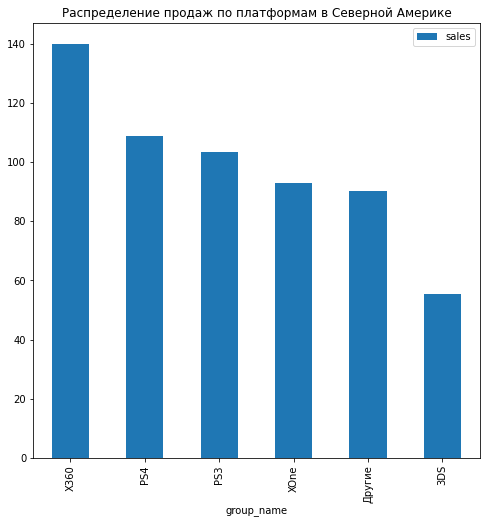

In [ ]:
# построим chart

sales_na_grouped.plot(y='sales', kind='bar', figsize=(8, 8))
plt.title('Распределение продаж по платформам в Северной Америке')

В лидерах по объему продаж в Северной Америке следующие игровые платформы с соответствующим распределением доли рынка:
    
    X360 - 24%, PS4 - 18%, PS3 - 17%, XOne - 16%, 3DS - 9%


Посмотрим на самые популярные жанры в Северной Америке

In [ ]:
# популярные жанры

sales_na_genre = df.query('year_of_release>=2012').pivot_table(index ='genre', values = 'na_sales', aggfunc = ['sum', 'count']).reset_index()
#sales_na_genre
sales_na_genre.columns = ['genre', 'sales', 'count']
sales_na_genre = sales_na_genre.sort_values(by='sales', ascending = False)
sales_na_genre.head()

,genre,sales,count
0,Action,177.84,1031
8,Shooter,144.77,235
10,Sports,81.53,268
7,Role-Playing,64.00,370
3,Misc,38.19,192


По жанрам в Северной Америке лидируют Action, Shooter, Sports, Role-Playing, Misc

Посмотрим влияет ли на продажи рейтинг ESRB.

    «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
    «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. 
    «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 

In [ ]:
sales_na_ESRB_dep = df.query('year_of_release>=2012').pivot_table(index='rating', values = 'na_sales', aggfunc = 'sum').reset_index()
sales_na_ESRB_dep.columns = ['rating', 'sales']
sales_na_ESRB_dep = sales_na_ESRB_dep.sort_values(by='sales', ascending = False )
sales_na_ESRB_dep

,rating,sales
2,M,231.57
0,E,114.37
4,Unknown,103.31
1,E10+,75.70
3,T,66.02


В Северной Америке в топе продукция категории "Для взрослых", затем "Для всех" и следом распологаются остальные категории.

### Проанализируем рынок в Европе

In [ ]:
# сформируем таблицу продаж по платформам в Европе

sales_eu = df.query('year_of_release>=2012').pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
sales_eu.columns = ['platform','sales']
sales_eu = sales_eu.sort_values(by='sales', ascending = False)
sales_eu.head(10)

,platform,sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64
2,PC,37.76
8,WiiU,25.13
7,Wii,11.92
6,PSV,11.36
1,DS,3.53


In [ ]:
# найдем ТОП 5 по продажам

sales_eu_top = sales_eu.query('sales > 40')

# выделим платформы с продажами менее 50 в группу Другие

sales_eu_grouped = sales_eu
sales_eu_grouped['group_name'] = sales_eu['platform'].where(
    sales_eu['platform'].isin(sales_eu_top.platform), 'Другие'  
)
sales_eu_grouped = sales_eu_grouped.pivot_table(index='group_name', values= 'sales', aggfunc='sum')
sales_eu_grouped = sales_eu_grouped.sort_values(by='sales', ascending=False)
sales_eu_grouped

,sales
group_name,
PS4,141.09
PS3,106.86
Другие,90.12
X360,74.52
XOne,51.59
3DS,42.64


Text(0.5, 1.0, 'Распределение продаж по платформам в Европе')

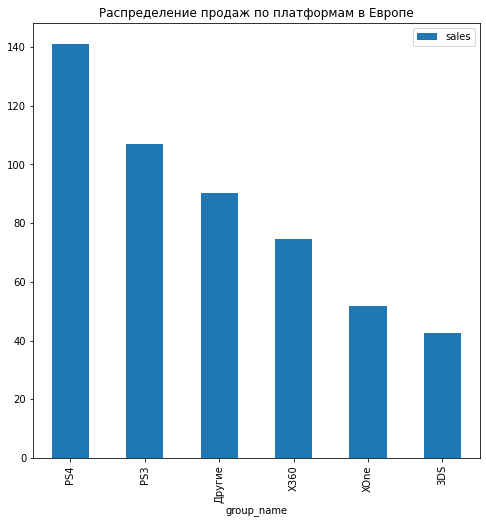

In [ ]:
# построим chart

sales_eu_grouped.plot(y='sales', kind='bar', figsize=(8, 8))
plt.title('Распределение продаж по платформам в Европе')

По объему продаж в Европе лидируют следующие платформы:

PS4 - 28%, PS3 - 21%, X360 - 15%, XOne - 10%, 3DC - 8%.


Посмотрим на самые популярные жанры в Европе


In [ ]:
# популярные жанры

sales_eu_genre = df.query('year_of_release>=2012').pivot_table(index ='genre', values = 'eu_sales', aggfunc = ['sum', 'count']).reset_index()
#sales_eu_genre
sales_eu_genre.columns = ['genre', 'sales', 'count']
sales_eu_genre = sales_eu_genre.sort_values(by='sales', ascending = False)
sales_eu_genre.head()

,genre,sales,count
0,Action,159.34,1031
8,Shooter,113.47,235
10,Sports,69.09,268
7,Role-Playing,48.53,370
6,Racing,27.29,115


По жанрам в Европе лидируют Action, Shooter, Sports, Role-Playing, Misc

Рейтинг ESRB:

    «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
    «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. 
    «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

In [ ]:
sales_eu_ESRB_dep = df.query('year_of_release>=2012').pivot_table(index='rating', values = 'eu_sales', aggfunc = 'sum').reset_index()
sales_eu_ESRB_dep.columns = ['rating', 'sales']
sales_eu_ESRB_dep = sales_eu_ESRB_dep.sort_values(by='sales', ascending = False )
sales_eu_ESRB_dep

,rating,sales
2,M,193.96
0,E,113.03
4,Unknown,91.50
1,E10+,55.37
3,T,52.96


В Европе, как и в Северной Америке, в топе продукция категории "Для взрослых", затем "Для всех" и следом располагаются остальные категории.

### Проанализируем рынок в Японии

In [ ]:
# сформируем таблицу продаж по платформам в Японии

sales_jp = df.query('year_of_release>=2012').pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
sales_jp.columns = ['platform','sales']
sales_jp = sales_jp.sort_values(by='sales', ascending = False)
sales_jp.head(10)

,platform,sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01
5,PSP,10.47
1,DS,3.72
7,Wii,3.39
9,X360,1.57
10,XOne,0.34


In [ ]:
# найдем ТОП 5 по продажам

sales_jp_top = sales_jp.query('sales > 11')

# выделим платформы с продажами менее 50 в группу Другие

sales_jp_grouped = sales_jp
sales_jp_grouped['group_name'] = sales_jp['platform'].where(
    sales_jp['platform'].isin(sales_jp_top.platform), 'Другие'  
)
sales_jp_grouped = sales_jp_grouped.pivot_table(index='group_name', values= 'sales', aggfunc='sum')
sales_jp_grouped = sales_jp_grouped.sort_values(by='sales', ascending=False)
sales_jp_grouped

,sales
group_name,
3DS,87.79
PS3,35.29
PSV,21.04
Другие,19.49
PS4,15.96
WiiU,13.01


Text(0.5, 1.0, 'Распределение продаж по платформам в Японии')

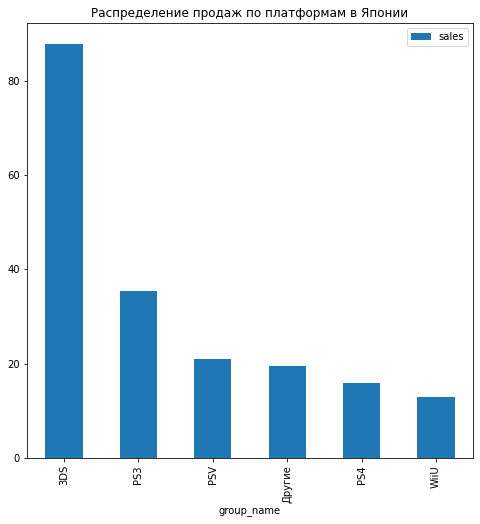

In [ ]:
# построим chart

sales_jp_grouped.plot(y='sales', kind='bar', figsize=(8, 8))
plt.title('Распределение продаж по платформам в Японии')

В Японии следующие лидеры по объему продаж:

3DC - 46%, PS3 - 18%, PSV - 11%, PS4 - 8%, WiiU - 7% 


Посмотрим на самые популярные жанры

In [ ]:
# популярные жанры

sales_jp_genre = df.query('year_of_release>=2012').pivot_table(index ='genre', values = 'jp_sales', aggfunc = ['sum', 'count']).reset_index()
#sales_jp_genre
sales_jp_genre.columns = ['genre', 'sales', 'count']
sales_jp_genre = sales_jp_genre.sort_values(by='sales', ascending = False)
sales_jp_genre.head()

,genre,sales,count
7,Role-Playing,65.44,370
0,Action,52.80,1031
3,Misc,12.86,192
9,Simulation,10.41,80
2,Fighting,9.44,109


<div style="background-color: RoyalBlue;">
Похоже сыграл еще один фактор (помимо открытости/закрытости) платформы. Этот фактор: мобильность. 3DS карманное устройство, в отличии от других ТОП платформ в нашем анализе. 
Похоже необходимо добавить в список игр еще поля Закрытость/Открытость платформы и поле Мобильная ли платформа. 
    Но почему эта же платформа на последних позициях по продажам в Северной Америке и Европе. Возможно есть страновый фактор. Особенность культуры и страны о которой пока нельзя судить исходя из имеющихся у нас данных. Можно предположить что в Японии мобильные игры более распространены в сравнении с другими регионами.
</div>

В Японии по жанрам лидируют Role-Playing, Action, Misc, Simulation, Fighting

Рейтинг ESRB:

    «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше.
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
    «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. 
    «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

In [ ]:
sales_jp_ESRB_dep = df.query('year_of_release>=2012').pivot_table(index='rating', values = 'jp_sales', aggfunc = 'sum').reset_index()
sales_jp_ESRB_dep.columns = ['rating', 'sales']
sales_jp_ESRB_dep = sales_jp_ESRB_dep.sort_values(by='sales', ascending = False )
sales_jp_ESRB_dep

,rating,sales
4,Unknown,108.84
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


<div style="background-color: RoyalBlue;">
 
Рейтинги нужны чтобы регулировать дистрибуцию по целевым аудиториям. Рейтинговая организация в Японии основана в 2002 году. Старые классические игры до периода рейтингов, вероятно, продаются суммарно больше.
</div>

сравним регионы между собой посмотрим и сравним популярные платформы и жанры игр

In [ ]:
print('Популярные платформы Северной Америки:')
print(sales_na_grouped.head())
print()
print('Популярные платформы Европы:')
print(sales_eu_grouped.head())
print()
print('Популярные платформы Японии:')
print(sales_jp_grouped.head())
print()

Популярные платформы Северной Америки:
             sales
group_name        
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
Другие       90.37

Популярные платформы Европы:
             sales
group_name        
PS4         141.09
PS3         106.86
Другие       90.12
X360         74.52
XOne         51.59

Популярные платформы Японии:
            sales
group_name       
3DS         87.79
PS3         35.29
PSV         21.04
Другие      19.49
PS4         15.96



In [ ]:
# популярные жанры в разных регионах

print('Популярные жанры Северной Америки:')
print(sales_na_genre.head())
print()
print('Популярные жанры Европы:')
print(sales_eu_genre.head())
print()
print('Популярные жанры Японии:')
print(sales_jp_genre.head())
print()

Популярные жанры Северной Америки:
           genre   sales  count
0         Action  177.84   1031
8        Shooter  144.77    235
10        Sports   81.53    268
7   Role-Playing   64.00    370
3           Misc   38.19    192

Популярные жанры Европы:
           genre   sales  count
0         Action  159.34   1031
8        Shooter  113.47    235
10        Sports   69.09    268
7   Role-Playing   48.53    370
6         Racing   27.29    115

Популярные жанры Японии:
          genre  sales  count
7  Role-Playing  65.44    370
0        Action  52.80   1031
3          Misc  12.86    192
9    Simulation  10.41     80
2      Fighting   9.44    109



ВЫВОДЫ:

Пользовательский портрет Северной Америки и Европы похожи. Популярны одни и те же игровые платформы. К тому же ТОП4 популярных жанров полностью идентичны.

Япония отличается по лидерам популярных платформ. Самая популярная площадка тут 3DS (не входит в ТОП5 других регионов) и занимает 46% рынка! Из жанров тут популярнее всего Role-Playing, Simulation и Fighting.

## Исследование статистических показателей

Посмотрим как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишим распределения

### Посмотрим как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах

In [ ]:
# также берем данные за последние 5 лет, чтобы исключить значимое искажение распределения по платформам

genre_score_pivot = df.query('year_of_release>=2012').pivot_table(index='genre', values=['critic_score', 'user_score'] , aggfunc='mean').reset_index()
genre_score_pivot.columns = ['genre', 'critic_score', 'user_score']
genre_score_pivot = genre_score_pivot.sort_values(by = 'critic_score', ascending = False)
genre_score_pivot


,genre,critic_score,user_score
11,Strategy,75.870968,6.420000
5,Puzzle,75.444444,7.633333
4,Platform,74.610169,6.806061
8,Shooter,73.421965,6.435897
7,Role-Playing,73.049689,7.258480
10,Sports,72.895105,5.455897
3,Misc,72.807018,6.938806
1,Adventure,72.661017,7.466667
6,Racing,71.864198,6.151163
0,Action,71.378440,6.825048


ВЫВОД:
Как правило оценки критиков выше оценок пользователей. Исключения в двух жанрах: Puzzle и Adventure.


Посчитаем среднее количество, дисперсию и стандартное отклонение

In [ ]:
# сформируем сводную таблицу с аггрегирующими функциями mean, np.var, np.std

genres_mean_var_std = df.query('year_of_release>=2012').pivot_table(index='genre', values=['critic_score', 'user_score'] , aggfunc = ['mean', np.var, np.std]).reset_index()
genres_mean_var_std.columns = ['genre', 'mean_critic_score', 'mean_user_score', 'var_critic_score', 'var_user_score','std_critic_score', 'std_user_score']
genres_mean_var_std = genres_mean_var_std.sort_values(by = 'genre', ascending = True)
genres_mean_var_std


,genre,mean_critic_score,mean_user_score,var_critic_score,var_user_score,std_critic_score,std_user_score
0,Action,71.378440,6.825048,146.258753,1.889084,12.093748,1.374440
1,Adventure,72.661017,7.466667,121.021040,1.632394,11.000956,1.277652
2,Fighting,70.406250,6.895714,179.768849,2.048532,13.407791,1.431269
3,Misc,72.807018,6.938806,101.087093,1.582411,10.054208,1.257939
4,Platform,74.610169,6.806061,188.069550,2.737193,13.713845,1.654447
5,Puzzle,75.444444,7.633333,48.277778,0.790000,6.948221,0.888819
6,Racing,71.864198,6.151163,157.343827,2.780881,12.543677,1.667597
7,Role-Playing,73.049689,7.258480,150.860016,1.634913,12.282509,1.278637
8,Shooter,73.421965,6.435897,154.884864,2.065509,12.445275,1.437188
9,Simulation,66.615385,6.511905,183.769231,3.285465,13.556151,1.812585


In [ ]:
# добавим столбец разницы между средними оценками критиков и пользователей
# чтобы найти те жанры у которых больше всех отличаются средние оценки от критиков и пользователей

genres_mean_var_std['delta_critic_user'] = genres_mean_var_std['mean_critic_score'] - (genres_mean_var_std['mean_user_score']*10)
genres_mean_var_std = genres_mean_var_std.sort_values(by='delta_critic_user', ascending=False)
genres_mean_var_std


,genre,mean_critic_score,mean_user_score,var_critic_score,var_user_score,std_critic_score,std_user_score,delta_critic_user
10,Sports,72.895105,5.455897,239.418497,3.022890,15.473154,1.738646,18.336131
11,Strategy,75.870968,6.420000,156.649462,4.124588,12.515968,2.030908,11.670968
6,Racing,71.864198,6.151163,157.343827,2.780881,12.543677,1.667597,10.352570
8,Shooter,73.421965,6.435897,154.884864,2.065509,12.445275,1.437188,9.062991
4,Platform,74.610169,6.806061,188.069550,2.737193,13.713845,1.654447,6.549563
3,Misc,72.807018,6.938806,101.087093,1.582411,10.054208,1.257939,3.418958
0,Action,71.378440,6.825048,146.258753,1.889084,12.093748,1.374440,3.127962
9,Simulation,66.615385,6.511905,183.769231,3.285465,13.556151,1.812585,1.496337
2,Fighting,70.406250,6.895714,179.768849,2.048532,13.407791,1.431269,1.449107
7,Role-Playing,73.049689,7.258480,150.860016,1.634913,12.282509,1.278637,0.464894


Таковым является жанр Sports

Построим гистограммы распределения средних оценок критиков и пользователей для жанра Sports

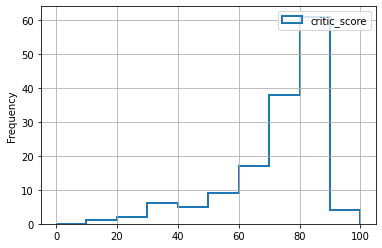

In [ ]:
# гистограмма оценок критиков для жанра Sports

df.query('year_of_release>=2012').query('genre == "Sports"')['critic_score'].plot(
    kind='hist',
    histtype='step',
    range = (0, 100),
    bins = 10,
    linewidth=2,
    grid=True,
    legend=True
)

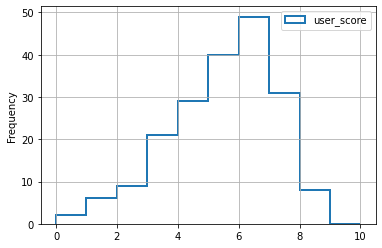

In [ ]:
# гистограмма оценок пользователей для жанра Sports

df.query('year_of_release>=2012').query('genre == "Sports"')['user_score'].plot(
    kind='hist',
    histtype='step',
    range = (0, 10),
    bins = 10,
    linewidth=2,
    grid=True,
    legend=True
)

ИТОГИ по игровому жанру Sports

Как мы видим, в общей массе игроки более критичны(6 из 10) к данному жанру, чем критики(80 из 100). 
Средняя оценка критиков составляет 72.8 из 100 возможных, а игроки поставили 5.4 из 10.

При этом эксперты голосовали более согласовано, стандартное отклонение по их оценкам составило 15.47 против 1.73 у пользователей. 

Теперь исследуем данные по самому популярному жанру в Северной Америке и Европе - жанру Action

Построим гистограммы распределения средних оценок критиков и пользователей для жанра Action

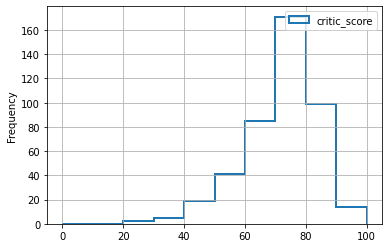

In [ ]:
# гистограмма оценок критиков для жанра Action

df.query('year_of_release>=2012').query('genre == "Action"')['critic_score'].plot(
    kind='hist',
    histtype='step',
    range = (0, 100),
    bins = 10,
    linewidth=2,
    grid=True,
    legend=True
)

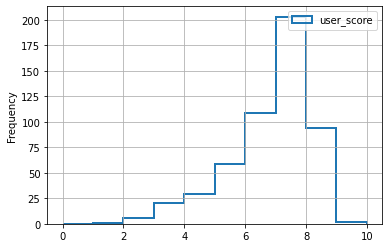

In [ ]:
# гистограмма оценок пользователей для жанра Action

df.query('year_of_release>=2012').query('genre == "Action"')['user_score'].plot(
    kind='hist',
    histtype='step',
    range = (0, 10),
    bins = 10,
    linewidth=2,
    grid=True,
    legend=True
)

ИТОГИ по игровому жанру Action

Можно отметить, что оценки критиков и игроков в жанре "Экшн" довольно близки друг другу(80 из 100 и соотв. 8 из 10). Но критики в целом ставят более высокую отметку(средняя критиков 71.3 из 100, против средней пользователей 6.8 из 10). 

И снова эксперты оказались чуть дружнее в своем голосовании, чем пользователи. Стандартное отклонение из таблицы выше дает нам их оценки 12.09 и 1,37. соответственно.

<div style="background-color: RoyalBlue;">

Скошенность влево говорит либо о длинном хвосте из слабых оценок, либо о наличии нескольких нулей в пользовательских рейтингах игр этого жанра. Также, как упоминалось ранее, жанр Action дороже в производстве и претензий к нему будет больше, поэтому вероятность провала игры в рейтингах очень велика.
</div>

## Проверка гипотез

### Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу:

    Средние пользовательские рейтинги платформ XOne и PC равны.

Сформулируем альтернативную гипотезу:

    Средние пользовательские рейтинги платформ XOne и PC отличаются.

За критический уровень статистической значимости примем 5%, если p-value окажется меньше него - отвергнем гипотезу


In [ ]:
# сформируем две совокупности для проверки нулевой гипотезы, возьмем данные за последние 5 лет

user_score_xone = df.query('year_of_release>=2012').query('platform == "XOne"')['user_score'].dropna()
user_score_pc = df.query('year_of_release>=2012').query('platform == "PC"')['user_score'].dropna()
alpha = 0.05  # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(user_score_xone, user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Итак, нулевую гипотезу отвергнуть не получилось, отсюда следует, что мы не можем сказать, что средние пользовательские рейтинги платформ XOne и PC не равны.

Полученное значение p-value говорит о том, что хотя средняя оценка пользовательских рейтингов двух платформ и не равна, с вероятностью в 55% такое или большее различие можно получить случайно.

Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами платформ XOne и PC.


### Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу:

    Средние пользовательские рейтинги жанров Action и Sports равны.

Сформулируем альтернативную гипотезу:

    Средние пользовательские рейтинги жанров Action и Sports отличаются.

За критический уровень статистической значимости примем 5%, если p-value окажется меньше него - отвергнем гипотезу гипотезу и подтвердим наше утверждение.


In [ ]:
# сформируем две совокупности для проверки нулевой гипотезы

user_score_action = df.query('year_of_release>=2012').query('genre == "Action"')['user_score'].dropna()
user_score_sports = df.query('year_of_release>=2012').query('genre == "Sports"')['user_score'].dropna()
alpha = 0.05  # критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(user_score_action, user_score_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, утверждение о том, что средние пользовательские рейтинги жанров Action и Sports разные - верно.

## Выводы

В данной работе мы проанализировали данные из открытых источников. Использовали исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Поставленная задача заключалась в выявлении определяющих успешность игры закономерностей, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

Проделанные шаги:
     
1. Подготовка данных
     
    - Замена названия столбцов и названий игр.
    - Преобразование типов данных в столбцах. 
    - Поиск и обработка пропусков.
    - Определены данные и их период для исключения искажения при анализе.
        
2. Проведение исследовательского анализ данных

    - Проведен анализ игр, сколько игр выпускалось в разные годы. 
    - Рассмотрены данные по изменениям продаж по платформам. Выбраны платформы с наибольшими суммарными продажами, построено распределение по годам. 
    - Мы нашли популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?
    - Определен период, данные за который нужно взять для исключения значимого искажения распределения по платформам в 2016 году.
    - Выяснили какие платформы лидируют по продажам, растут и падают. Выбрали несколько потенциально прибыльных платформ.
    - Построили график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 
    - Выяснили велика ли разница в абсолютных продажах и в средних на разных платформах? 
    - Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
    - Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. 
    - Посмотрели на общее распределение игр по жанрам. Нашли самые прибыльные жанры.
    
3. Составили портрет пользователя каждого региона 

    - Северной Америке
    - Европе
    - Японии
    - Нашли самые популярные платформы (топ-5) в каждом регионе. Нашли их доли рынка. 
    - Выяснили самые популярные жанры (топ-5) в каждом регионе.
    - изучили влияет ли рейтинг ESRB на продажи в отдельном регионе?

4. Провели исследования статистических показателей

    - Посмотрели как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах. 
    - Посчитайте среднее, дисперсию и стандартное отклонение. 
    - Построили гистограммы.

5. Проверили гипотезы

    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.

6. Полученные результаты
    
    Исходя из поставленой задачи, даются следующие рекомендации о том на какой потенциально популярный продукт следует обратить внимание и как спланировать рекламные кампании на следующий год:
    
    1. Для рекламные кампании по Северной Америке следует обратить внимание на следующие моменты:   
    Платформы: лидер рынка X360 - 24%. Далее по убыванию: PS4 - 18%, PS3 - 17%, XOne - 16%, 3DS - 9%.
    Самые популярные жанры в регионе: Action и Shooter, которые лидируют с большим отрывом от других игр. 
    
    2. Для рекламные кампании по Европе следует обратить внимание на следующие моменты: 
    Платформы: лидеры рынка:  PS4 - 28%, PS3 - 21%, далее идут: X360 - 15%, XOne - 10%, 3DC - 8%.
    Самые популярные жанры в Европе: Action и Shooter, которые лидируют с большим отрывом от других игр
    
    3. Для рекламные кампании по Японии следует обратить внимание на следующие моменты: 
    Платформы: лидер рынка  3DC - 46%, далее идут: PS3 - 18% и PSV - 11%.
    Самые популярные жанры в Японии: Role-Playing и Action.
    Предпочтение публика отдает мобильным платформам. 
    
    4. Продажи во всех регионах в большей степени зависят от оценок экспертов, нежели от пользовательских рейтингов. Закрытость платформы является плюсом при учете доходов с продаж.
    
    5. Также нужно иметь ввиду, что
    Есть большая вероятность, что нет существенного различия между средними пользовательскими рейтингами платформ XOne и PC.
    Вероятно, что средние пользовательские рейтинги жанров Action и Sports разные. 
